In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk, pickle
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model 

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/fake-news/train.csv')

In [3]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


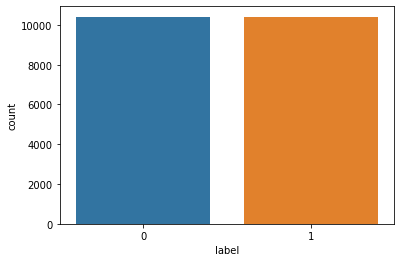

In [4]:
sns.countplot(data = train_df, x = train_df['label'])

In [5]:
train_df.dropna(inplace = True)

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['text'])
X_seq = tokenizer.texts_to_sequences(train_df['text'])
X_pad = pad_sequences(X_seq, maxlen = 500)

In [7]:
vocab_size = len(tokenizer.word_index) + 1

In [8]:
Y = train_df['label']

In [12]:
model_lstm = keras.models.Sequential([
        keras.layers.Embedding(vocab_size, 40, input_length = 500),
        tf.compat.v1.keras.layers.CuDNNLSTM(100),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation = 'sigmoid')
])

model_lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 40)           8566800   
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 100)               56800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 8,623,701
Trainable params: 8,623,701
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_lstm.fit(X_pad, Y, validation_split = 0.2, batch_size = 16, epochs = 5)

Epoch 1/5
915/915 [==============================] - 104s 110ms/step - loss: 0.4260 - accuracy: 0.7992 - val_loss: 0.2209 - val_accuracy: 0.9133
Epoch 2/5
915/915 [==============================] - 95s 104ms/step - loss: 0.1412 - accuracy: 0.9504 - val_loss: 0.2805 - val_accuracy: 0.8800
Epoch 3/5
915/915 [==============================] - 95s 104ms/step - loss: 0.1126 - accuracy: 0.9635 - val_loss: 0.3048 - val_accuracy: 0.8805
Epoch 4/5
915/915 [==============================] - 95s 104ms/step - loss: 0.1247 - accuracy: 0.9538 - val_loss: 0.2182 - val_accuracy: 0.9396
Epoch 5/5
915/915 [==============================] - 95s 103ms/step - loss: 0.0243 - accuracy: 0.9931 - val_loss: 0.2559 - val_accuracy: 0.9240


In [15]:
model_lstm.save("fake_news_detector_model_lstm.h5")

In [16]:
with open("fake_news_detector_model_lstm.json", "w") as json_file:
  model_json = model_lstm.to_json() 
  json_file.write(model_json) 
  
# Saving weights of the model to a HDF5 file 
model_lstm.save_weights("fake_news_detector_model_lstm_weights.h5")

In [19]:
model_gru = keras.models.Sequential([
        keras.layers.Embedding(vocab_size, 40, input_length = 500),
        keras.layers.GRU(100),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation = 'sigmoid')
])

model_gru.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 40)           8566800   
_________________________________________________________________
gru (GRU)                    (None, 100)               42600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 8,609,501
Trainable params: 8,609,501
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_gru.fit(X_pad, Y, validation_split = 0.2, batch_size = 16, epochs = 5)

Epoch 1/5
915/915 [==============================] - 96s 103ms/step - loss: 0.5548 - accuracy: 0.7879 - val_loss: 0.2498 - val_accuracy: 0.9037
Epoch 2/5
915/915 [==============================] - 92s 101ms/step - loss: 0.1334 - accuracy: 0.9570 - val_loss: 0.1429 - val_accuracy: 0.9502
Epoch 3/5
915/915 [==============================] - 91s 100ms/step - loss: 0.0797 - accuracy: 0.9741 - val_loss: 0.1726 - val_accuracy: 0.9360
Epoch 4/5
915/915 [==============================] - 92s 100ms/step - loss: 0.3402 - accuracy: 0.8903 - val_loss: 0.1717 - val_accuracy: 0.9349
Epoch 5/5
915/915 [==============================] - 91s 100ms/step - loss: 0.0587 - accuracy: 0.9830 - val_loss: 0.1594 - val_accuracy: 0.9418


In [21]:
model_gru.save("fake_news_detector_model_gru.h5")

In [22]:
with open("fake_news_detector_model_gru.json", "w") as json_file:
  model_gru_json = model_gru.to_json() 
  json_file.write(model_gru_json) 

In [23]:
# Saving weights of the model to a HDF5 file 
model_gru.save_weights("fake_news_detector_model_gru_weights.h5")

In [26]:
model_bilstm = keras.models.Sequential([
        keras.layers.Embedding(vocab_size, 40, input_length = 500),
        keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=True)),
        keras.layers.Bidirectional(keras.layers.LSTM(100)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation = 'sigmoid')
])

model_bilstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_bilstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 40)           8566800   
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 200)          112800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 8,920,601
Trainable params: 8,920,601
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_bilstm.fit(X_pad, Y, validation_split = 0.2, batch_size = 16, epochs = 5)

Epoch 1/5
915/915 [==============================] - 135s 142ms/step - loss: 0.4517 - accuracy: 0.7927 - val_loss: 0.2594 - val_accuracy: 0.8961
Epoch 2/5
915/915 [==============================] - 129s 141ms/step - loss: 0.1689 - accuracy: 0.9386 - val_loss: 0.1967 - val_accuracy: 0.9286
Epoch 3/5
915/915 [==============================] - 130s 142ms/step - loss: 0.0532 - accuracy: 0.9828 - val_loss: 0.2171 - val_accuracy: 0.9325
Epoch 4/5
915/915 [==============================] - 130s 142ms/step - loss: 0.0234 - accuracy: 0.9935 - val_loss: 0.3663 - val_accuracy: 0.9128
Epoch 5/5
915/915 [==============================] - 129s 141ms/step - loss: 0.0128 - accuracy: 0.9976 - val_loss: 0.2757 - val_accuracy: 0.9155


In [28]:
model_bilstm.save("fake_news_detector_model_bilstm.h5")

with open("fake_news_detector_model_bilstm.json", "w") as json_file:
  model_bilstm_json = model_bilstm.to_json() 
  json_file.write(model_bilstm_json) 

# Saving weights of the model to a HDF5 file 
model_bilstm.save_weights("fake_news_detector_model_bilstm_weights.h5")

In [ ]:
# Without dropout
# model.fit(X_pad, Y, validation_split = 0.2, batch_size = 16, epochs = 10)

Epoch 1/10
915/915 [==============================] - 105s 106ms/step - loss: 0.4300 - accuracy: 0.7918 - val_loss: 0.2556 - val_accuracy: 0.8882
Epoch 2/10
915/915 [==============================] - 96s 105ms/step - loss: 0.1795 - accuracy: 0.9302 - val_loss: 0.1956 - val_accuracy: 0.9229
Epoch 3/10
915/915 [==============================] - 95s 104ms/step - loss: 0.0595 - accuracy: 0.9800 - val_loss: 0.1967 - val_accuracy: 0.9289
Epoch 4/10
915/915 [==============================] - 95s 103ms/step - loss: 0.0202 - accuracy: 0.9943 - val_loss: 0.2472 - val_accuracy: 0.9286
Epoch 5/10
915/915 [==============================] - 95s 103ms/step - loss: 0.0261 - accuracy: 0.9908 - val_loss: 0.3245 - val_accuracy: 0.9054
Epoch 6/10
915/915 [==============================] - 95s 104ms/step - loss: 0.0759 - accuracy: 0.9777 - val_loss: 0.2608 - val_accuracy: 0.9212
Epoch 7/10
915/915 [==============================] - 95s 104ms/step - loss: 0.0282 - accuracy: 0.9919 - val_loss: 0.3370 - val_a